<h1>Data Wrangling</h1>

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Gather Data</h2>
Gather data from downloaded file

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

Extract tweet_id from url

In [3]:
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:5]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

Download file using Requests library

In [4]:
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df2=pd.read_csv('image_prediction.tsv',delimiter='\t')

Gather data from twitter API using Python's Tweepy library and store data

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

'''tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df3.tweet_id=df3.tweet_id.astype(str)

<h2>Assess Data</h2>

In [6]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
df2.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [9]:
df3.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


<h2>Quality</h2>

<li> Tweet_ID in df1 has a missing data.</li>
<li>erroneous datatypes in Tweet_ID, in_reply_to_status_id, in_reply_to_user_id and timestamp.</li>
<li> df1 shouldn't have a retweets because only original ratings is needed. also missing images in ratings and some ratings are wrong.</li>
<li>nulls in df1 represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.</li>
<li>Also in df1 some dog names are not correct.</li>
<li>In df2 erroneous dog names there is no column for each dog phase.</li>
<li>Unuseful columns In df1 should be removed 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' .</li>


<h2>Tidiness</h2>

<li>these columns in df1 'doggo', 'floofer', 'pupper','puppo' represent one variable so it should be merged in a one column named 'phase'.</li>
<li> Rating_numerator and denominator should be compined in one variable rating.</li>
<li> df3 should be part of df1</li>
<li>The information about one type of observational unit is spread across three dataframes, So merge all  dataframes in order to create one master dataset.</li>


<h1>Clean Data</h1>

In [10]:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

To clean the dataset first delete unusefull columns 
<h4>Define:</h4>
<li>1- Delete retweets and observations without ID 
<li>2- delete columns: 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

In [11]:
#delete columns 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
df1_clean=df1_clean[df1.tweet_id.notnull()]
df1_clean=df1_clean[df1.retweeted_status_id.isnull()]
df1_clean=df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<h4>Test</h4>

In [12]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
doggo                    2023 non-null object
floofer                  2023 non-null object
pupper                   2023 non-null object
puppo                    2023 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+ KB


<h4>Define</h4>
Not all ratings have images and we only needs rating with images.
So Delete observations without image

In [13]:
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
image_id=df2_clean[['tweet_id']]
df1_clean=pd.merge(df1_clean,image_id,on='tweet_id')

<h4>Test</h4>

In [14]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+ KB


<h4>Define</h4>

<li>drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan 
<li>create 'phase' column to represent a dog phase of life.

In [15]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['phase']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.phase=df1_clean.phase.replace('',np.nan)

<h4>Test</h4>

In [16]:
df1_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,phase
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


<h4>Define</h4> join df3 table to df1 table on tweet_id.

In [17]:
df3_clean=df3_clean[~(df3_clean.tweet_id.duplicated())]
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id',how='left')
df1_clean[df1_clean.tweet_id=='892420643555336193']
missingcount_id=df1_clean.tweet_id[df1_clean.retweet_count.isnull()]

<h4>Test</h4>

In [18]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
phase                    306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 298.1+ KB


<h4>Define</h4> 
<li>Convert timestamp to datetime data type
<li>convert in_reply_to_status_id and in_reply_to_user_id to string data type.

In [19]:
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

reply_id=df1_clean.tweet_id[df1_clean.in_reply_to_user_id.notnull()]
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.astype(str)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.astype(str)
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.replace('nan',np.nan)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.replace('nan',np.nan)

<h4>Test</h4>

In [20]:
df1_clean.info()
df1_clean[df1_clean.in_reply_to_user_id.notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
phase                    306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 298.1+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,phase,retweet_count,favorite_count
119,863079547188785154,6.67152164079e+17,4196983835.0,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,None,NaN,1195,9094
146,856526610513747968,8.55818117272e+17,4196983835.0,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,None,NaN,2068,12446
192,844979544864018432,7.59099523533e+17,4196983835.0,2017-03-23 18:29:57,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,13,10,None,NaN,2909,14738
419,802265048156610565,7.33109485276e+17,4196983835.0,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggopupper,1573,7039
756,746906459439529985,7.46885919388e+17,4196983835.0,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,NaN,336,3168
758,746818907684614144,6.91416866452e+17,4196983835.0,2016-06-25 21:34:37,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,10,None,NaN,1944,5807
855,729838605770891264,7.29113531271e+17,4196983835.0,2016-05-10 01:00:58,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",https://twitter.com/dog_rates/status/729838605...,12,10,None,NaN,431,1856
1035,705786532653883392,7.03255935813e+17,4196983835.0,2016-03-04 16:06:36,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,None,pupper,596,2132
1044,704871453724954624,6.67152164079e+17,4196983835.0,2016-03-02 03:30:25,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,10,None,NaN,1245,4585
1059,703425003149250560,7.0304194965e+17,4196983835.0,2016-02-27 03:42:44,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,9,10,None,NaN,1559,4162


<h4>Define</h4> Correcet column 'name' convert wrong names with np.nan.

In [21]:
df1_clean.loc[df1_clean.name.str.islower(),'name']='None'
df1_clean.name=df1_clean.name.replace('None',np.nan)

<h4>Test</h4>

In [22]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1350 non-null object
phase                    306 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 298.1+ KB


<h4>Define</h4> 
correct the wrong value oberservations of rating_numerator and rating_denominator, if rating_denominator > 10 and divisible by 10 use the quotient as divisor to divide the rating_numerator, if the numerator is divisible assign the quotient as the rating_numerator, then the rest records if the text column contains any fraction with denominator 10 update the rating_denominator to 10 and update the rating_numerator with the numerator value of this fraction.
Create new column rating=rating_numerator/rating_denominator and then drop rating_numerator and rating_denominator also drop oberservations with extreme ratings.


In [23]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [24]:
df1_clean=df1_clean[df1_clean.tweet_id!='810984652412424192']
df1_clean.loc[df1_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df1_clean.loc[df1_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df1_clean.loc[df1_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df1_clean.loc[df1_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df1_clean.loc[df1_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df1_clean['rating']=df1_clean.rating_numerator/df1_clean.rating_denominator
df1_clean=df1_clean.drop(['rating_numerator','rating_denominator'],axis=1)

df1_clean.loc[df1_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [25]:
df1_clean.loc[df1_clean.tweet_id=='786709082849828864','rating']=1.0
df1_clean.loc[df1_clean.tweet_id=='778027034220126208','rating']=1.1
df1_clean.loc[df1_clean.tweet_id=='680494726643068929','rating']=1.1
df1_clean=df1_clean[df1_clean.rating<2]

<h4>Test</h4>

In [26]:
df1_clean.rating.sort_values()

235     0.0
756     0.0
1735    0.1
1900    0.1
1976    0.1
1519    0.1
1887    0.2
1878    0.2
1419    0.2
1948    0.2
1422    0.2
1987    0.2
1723    0.2
1566    0.2
1964    0.2
1574    0.3
1584    0.3
554     0.3
1355    0.3
1547    0.3
1880    0.3
1592    0.3
1273    0.3
1780    0.3
1487    0.3
1167    0.3
1943    0.3
1844    0.3
1826    0.3
1021    0.3
       ... 
9       1.4
786     1.4
146     1.4
275     1.4
162     1.4
153     1.4
119     1.4
206     1.4
549     1.4
399     1.4
324     1.4
49      1.4
113     1.4
455     1.4
131     1.4
36      1.4
297     1.4
362     1.4
64      1.4
1280    1.4
278     1.4
100     1.4
313     1.4
256     1.4
253     1.4
318     1.4
21      1.4
681     1.4
800     1.4
571     1.4
Name: rating, Length: 1991, dtype: float64

<h4>Define</h4>
Create new columns prdct_breed and prdct_conf.

In [27]:
df2_clean['prdct_breed']=df2_clean.p1
df2_clean.prdct_breed[df2_clean.p1_dog==False]=df2_clean.p2
df2_clean.prdct_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3
df2_clean.prdct_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]='None' 
df2_clean.prdct_breed=df2_clean.prdct_breed.replace('None',np.nan)
df2_clean.prdct_breed[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    Welsh_springer_spaniel
1    redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    miniature_pinscher    
5    Bernese_mountain_dog  
6    NaN                   
7    chow                  
8    golden_retriever      
9    miniature_poodle      
Name: prdct_breed, dtype: object

In [28]:
df2_clean['prdct_conf']=df2_clean.p1_conf
df2_clean.prdct_conf[df2_clean.p1_dog==False]=df2_clean.p2_conf
df2_clean.prdct_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3_conf
df2_clean.prdct_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]=0 
df2_clean.prdct_conf=df2_clean.prdct_conf.replace(0,np.nan)
df2_clean.prdct_conf[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    0.465074
1    0.506826
2    0.596461
3    0.408143
4    0.560311
5    0.651137
6   NaN      
7    0.692517
8    0.007959
9    0.201493
Name: prdct_conf, dtype: float64

<h2>Disply DataFrame Final Test </h2>

In [29]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1348 non-null object
phase                    306 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
rating                   1991 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 202.2+ KB


In [30]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id       2075 non-null object
jpg_url        2075 non-null object
img_num        2075 non-null int64
p1             2075 non-null object
p1_conf        2075 non-null float64
p1_dog         2075 non-null bool
p2             2075 non-null object
p2_conf        2075 non-null float64
p2_dog         2075 non-null bool
p3             2075 non-null object
p3_conf        2075 non-null float64
p3_dog         2075 non-null bool
prdct_breed    1751 non-null object
prdct_conf     1751 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


<h2>Store Data</h2>
Store the clean DataFrames df1_clean in a CSV file named twitter_archive_master.csv after merging the dataframs, and also store and df2_clean in additional file 'twitter_image_predictions.csv'.

In [31]:
#first merge dataframes


df4_clean=pd.merge(df1_clean,df2_clean,on='tweet_id')
df4_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image_predictions.csv', index=False)

<h2>Analyze and Visualize Data</h2>

In [32]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 25 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1348 non-null object
phase                    306 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
rating                   1991 non-null float64
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog            

In [33]:
df4_clean.describe()

,retweet_count,favorite_count,rating,img_num,p1_conf,p2_conf,p3_conf,prdct_conf
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1685.000000
mean,2766.526871,8899.343044,1.055450,1.203415,0.594082,1.345157e-01,6.027009e-02,0.549745
std,4678.024127,12221.969511,0.217822,0.561144,0.271856,1.007215e-01,5.092272e-02,0.299257
min,16.000000,81.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000010
25%,623.500000,1976.000000,1.000000,1.000000,0.362880,5.397835e-02,1.614795e-02,0.302685
50%,1350.000000,4127.000000,1.100000,1.000000,0.587764,1.175660e-01,4.948690e-02,0.550506
75%,3220.000000,11321.000000,1.200000,1.000000,0.845942,1.953115e-01,9.164355e-02,0.821704
max,79515.000000,132810.000000,1.400000,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956


In [34]:
values=np.sort(df4_clean.rating.unique())
values

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4])

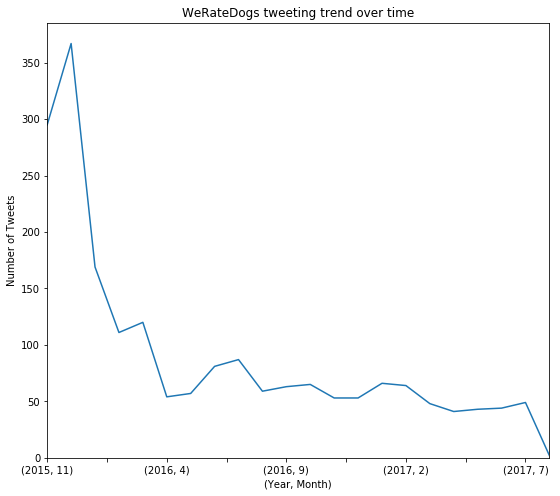

In [35]:

plt.rcParams["figure.figsize"] = [9, 8]

data = df1_clean.tweet_id.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')



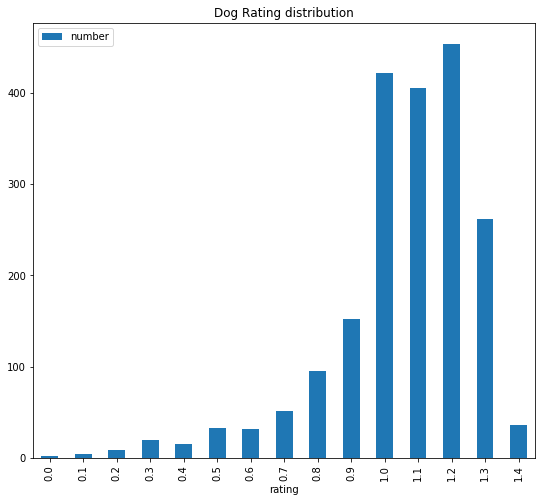

In [36]:
plt.rcParams["figure.figsize"] = [9, 8]
rating_anlyz=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_anlyz['rating']=values
for x in rating_anlyz['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_anlyz.loc[rating_anlyz.rating==x,'number']=this_df['tweet_id'].count()
    rating_anlyz.loc[rating_anlyz.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_anlyz.loc[rating_anlyz.rating==x,'favorite']=this_df.favorite_count.mean()
rating_anlyz[['rating','number']].plot(x='rating',kind='bar', title='Dog Rating distribution')

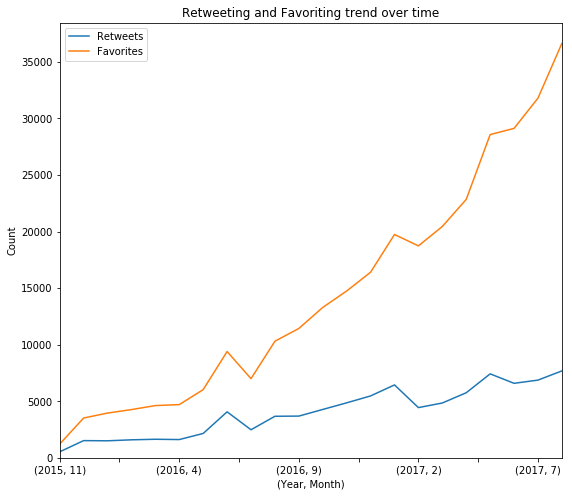

In [37]:
plt.rcParams["figure.figsize"] = [9, 8]
df1_clean.retweet_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot('line')
df1_clean.favorite_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')


In [ ]:
plt.rcParams["figure.figsize"] = [9, 8]
phase_anlyz=pd.DataFrame(columns=['phase','number','rating','retweet','favorite'])
phase_anlyz['phase']=['doggo','floofer','pupper','puppo']
for each_phase in phase_anlyz.phase:
    phase_df=df1_clean[df1_clean.phase==each_phase]
    phase_anlyz.loc[phase_anlyz.phase== each_phase,'number']=phase_df.shape[0]
    phase_anlyz.loc[phase_anlyz.phase== each_phase,'rating']=phase_df['rating'].mean()
    phase_anlyz.loc[phase_anlyz.phase== each_phase,'retweet']=phase_df['retweet_count'].mean()
    phase_anlyz.loc[phase_anlyz.phase== each_phase,'favorite']=phase_df['favorite_count'].mean()
phase_anlyz[['phase','number']].plot(x='phase',kind='bar',title='WeRateDogs Dog phases Distribution')
phase_anlyz[['phase','retweet','favorite']].plot(x='phase',kind='bar',title='Dog phase-Retweet&Favorite Analysis')
phase_anlyz[['phase','rating']].plot(x='phase',kind='bar',title='Dog phase-Rating Analysis')

<h2>Insights</h2>
<li>WeRateDogs dataset has the highest tweeting trend over time at 2015 and has been decreased over Time, Also retweeting and favoriting trend over time keeps increasing and reaches the highest at 2017.</li>
<li>The highest ratings are 1.2,1.0,1.1 also rating frequency is less whenever the rating is extreme.</li>
<li>pupper phase has the highest frequency, in the other hand pupper has lowest favorite counts and retweet counts and rating.</li>
